In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from automap import AUTOMAP

## Learning curve

In [2]:
train_loss, test_loss = np.load('train_loss.npy'), np.load('test_loss.npy')

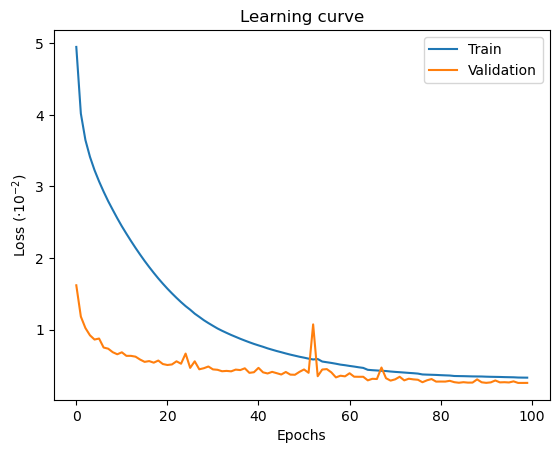

In [3]:
epochs = [_ for _ in range(100)]

plt.plot(epochs, train_loss * 1e2, label='Train')
plt.plot(epochs, test_loss * 1e2, label='Validation')
plt.xlabel('Epochs')
plt.ylabel(r'Loss $(\cdot 10^{-2})$')
plt.title('Learning curve')
plt.legend()
plt.show()

## Model avaliation

In [4]:
n = 128

automap = AUTOMAP(n)

In [5]:
model = torch.load('n128_b64_lr1e-5_L11e-4_brain_ps1e-2_reducelrplateau_v0.pth', map_location=torch.device('cpu'))

automap.load_state_dict(model)

<All keys matched successfully>

In [15]:
data = np.load('images.npz')

sin=torch.tensor(data['sin'])
sin_ps=torch.tensor(data['sin_ps'])
sin_ma=torch.tensor(data['sin_ma'])
sin_mw=torch.tensor(data['sin_mw'])
im_im=torch.tensor(data['im_im'])
im_ps=torch.tensor(data['im_ps'])
im_ma=torch.tensor(data['im_ma'])
im_mw=torch.tensor(data['im_mw'])

In [6]:
x_test, y_test = np.load('test_sin_brain.npy'), np.load('test_im_brain.npy')

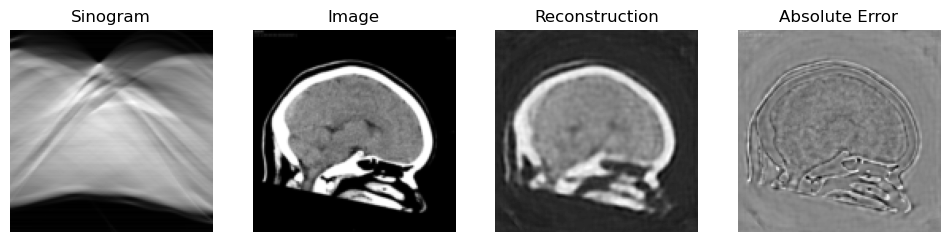

In [7]:
sin0, im0 = torch.tensor(x_test[0]), torch.tensor(y_test[0])

noise = 0.01 * torch.kron(torch.rand(sin0.shape[0], 1), torch.ones(1, sin0.shape[1])) 
sin0 += noise

with torch.no_grad():
    im_pred0 = automap(sin0.reshape(1, n, n))
    im_pred0 = im_pred0.reshape(n, n)
    
fig, ax = plt.subplots(1, 4, figsize=(12, 4))

ax[0].imshow(sin0.reshape(n, n), 'gray')
ax[0].axis('off')
ax[0].set_title('Sinogram')

ax[1].imshow(im0.reshape(n, n), 'gray')
ax[1].axis('off')
ax[1].set_title('Image')

ax[2].imshow(im_pred0.reshape(n, n), 'gray')
ax[2].axis('off')
ax[2].set_title('Reconstruction')

ax[3].imshow((im0 - im_pred0).reshape(n, n), 'gray')
ax[3].axis('off')
ax[3].set_title('Absolute Error')

plt.show()

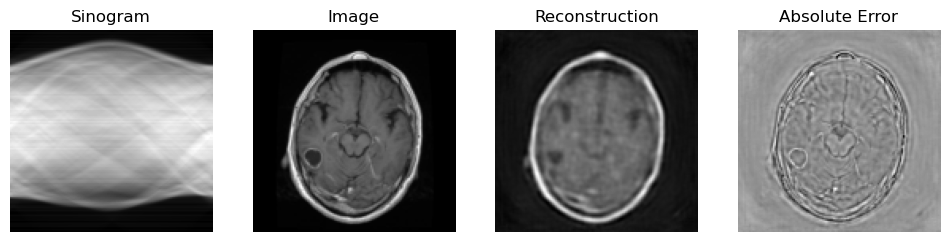

In [8]:
sin1, im1 = torch.tensor(x_test[1]), torch.tensor(y_test[1])

noise = 0.01 * torch.kron(torch.rand(sin1.shape[0], 1), torch.ones(1, sin1.shape[1])) 
sin1 += noise

with torch.no_grad():
    im_pred1 = automap(sin1.reshape(1, n, n))
    im_pred1 = im_pred1.reshape(n, n)
    
fig, ax = plt.subplots(1, 4, figsize=(12, 4))

ax[0].imshow(sin1.reshape(n, n), 'gray')
ax[0].axis('off')
ax[0].set_title('Sinogram')

ax[1].imshow(im1.reshape(n, n), 'gray')
ax[1].axis('off')
ax[1].set_title('Image')

ax[2].imshow(im_pred1.reshape(n, n), 'gray')
ax[2].axis('off')
ax[2].set_title('Reconstruction')

ax[3].imshow((im1 - im_pred1).reshape(n, n), 'gray')
ax[3].axis('off')
ax[3].set_title('Absolute Error')

plt.show()

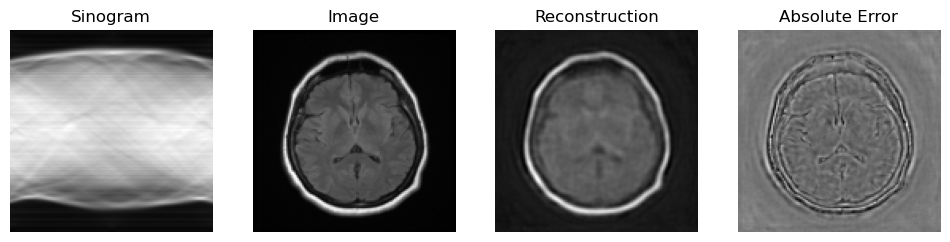

In [9]:
sin2, im2 = torch.tensor(x_test[2]), torch.tensor(y_test[2])

noise = 0.01 * torch.kron(torch.rand(sin2.shape[0], 1), torch.ones(1, sin2.shape[1])) 
sin2 += noise

with torch.no_grad():
    im_pred2 = automap(sin2.reshape(1, n, n))
    im_pred2 = im_pred2.reshape(n, n)
    
fig, ax = plt.subplots(1, 4, figsize=(12, 4))

ax[0].imshow(sin2.reshape(n, n), 'gray')
ax[0].axis('off')
ax[0].set_title('Sinogram')

ax[1].imshow(im2.reshape(n, n), 'gray')
ax[1].axis('off')
ax[1].set_title('Image')

ax[2].imshow(im_pred2.reshape(n, n), 'gray')
ax[2].axis('off')
ax[2].set_title('Reconstruction')

ax[3].imshow((im2 - im_pred2).reshape(n, n), 'gray')
ax[3].axis('off')
ax[3].set_title('Absolute Error')

plt.show()